In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from datasets import matches_by_teams
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset, por motivos de prueba, se eliminarán las variables cualitativas y se limpiarán los nulos con el promedio
matches_by_teams_df = matches_by_teams()
matches_by_teams_df = matches_by_teams_df.drop(['color', 'team_id', 'team_name', 'team_region'], axis=1)
matches_by_teams_df = matches_by_teams_df.fillna(matches_by_teams_df.mean())
X = matches_by_teams_df.drop('winner', axis=1)
y = matches_by_teams_df.winner

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    KNeighborsClassifier(n_neighbors=5),
    LogisticRegression(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    SVC()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_name = model.__class__.__name__
    print(f"Modelo: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precisión: {precision}")
    print(f"Recall: {recall}")
    print(f"F1: {f1}")
    print("\n")

Modelo: KNeighborsClassifier
Accuracy: 0.6418121755545069
Precisión: 0.6389396709323584
Recall: 0.6575729068673566
F1: 0.6481223922114048


Modelo: LogisticRegression
Accuracy: 0.7277017461066541
Precisión: 0.6940894568690096
Recall: 0.8174976481655691
F1: 0.7507559395248379


Modelo: RandomForestClassifier
Accuracy: 0.997168475696083
Precisión: 0.9953139643861293
Recall: 0.9990592662276576
F1: 0.9971830985915493


Modelo: SVC
Accuracy: 0.4789995280792827
Precisión: 0.4861205145565335
Recall: 0.6754468485418627
F1: 0.5653543307086615




El siguiente bloque se utilizará solo con un propósito, cambiar las variables categóricas con get_dummies, de todas maneras la única columna que puede ser la que más aporte al modelo

In [3]:
# Cargar el dataset, por motivos de prueba, se eliminarán las variables cualitativas y se limpiarán los nulos con el promedio
matches_by_teams_df = matches_by_teams()
matches_by_teams_df = matches_by_teams_df.drop(['color', 'team_id', 'team_name'], axis=1)
matches_by_teams_df = pd.get_dummies(matches_by_teams_df, columns=['team_region'])
matches_by_teams_df = matches_by_teams_df.fillna(matches_by_teams_df.mean())
X = matches_by_teams_df.drop('winner', axis=1)
y = matches_by_teams_df.winner

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    KNeighborsClassifier(n_neighbors=5),
    LogisticRegression(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    SVC()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_name = model.__class__.__name__
    print(f"Modelo: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precisión: {precision}")
    print(f"Recall: {recall}")
    print(f"F1: {f1}")
    print("\n")

Modelo: KNeighborsClassifier
Accuracy: 0.6418121755545069
Precisión: 0.6389396709323584
Recall: 0.6575729068673566
F1: 0.6481223922114048


Modelo: LogisticRegression
Accuracy: 0.7277017461066541
Precisión: 0.6940894568690096
Recall: 0.8174976481655691
F1: 0.7507559395248379


Modelo: RandomForestClassifier
Accuracy: 0.9976403964134025
Precisión: 0.9962476547842402
Recall: 0.9990592662276576
F1: 0.9976514795678724


Modelo: SVC
Accuracy: 0.4789995280792827
Precisión: 0.4861580013504389
Recall: 0.6773283160865475
F1: 0.5660377358490566




Se puede ver que realmente la diferencia es nula, por lo tanto se descartará en el modelo elegido

# Elección de modelo
En base a los resultados, podemos tener las primeras conclusiones:
- En primer lugar podemos descartar el modelo SVC ya que tiene los indicadores más bajos.
- El modelo de Random Forest en todas las evaluaciones tiene cálculos cercanos al 100%, por ende, podemos decir que tiende al overfitting, y también se descartará.
- Entre los 2 que quedan, el que tiene mejores números es **LogisticRegression**, por lo tanto se trabajará con el.

## LogisticRegression
En base a sus resultados, podemos decir lo siguiente:
- Tiene una buena efectividad, pero debemos recodar que este es solo la punta del iceberg y es un indicador que tiende a engañar un poco.
- La precisión indica el porcentaje de las predicciones positivas sean correctas, por lo tanto, llevado a este caso indica que de los partidos que el modelo predijo como "partidos ganados" tuvo un **69,4%** de acierto.
- El recall indica el porcentaje en que el modelo puede predecir resultados positivos, es decir, en este caso se indica que de todos los partidos ganados, acertó un **81,7%**
- El valor F1 es una combinación entre precisión y recall, ya que en rigor, la precisión busca reducir los falsos positivos y el recall los falsos negativos. En base a esto, podemos decir que el porcentaje de 75,1% de esta métrica sugiere que hay un buen equilibrio entre ambos porcentaje.

Con estas métricas, y solo para mostrar algo más gráfico, se realizará la matriz de confusión de este modelo y la curva AUC-ROC

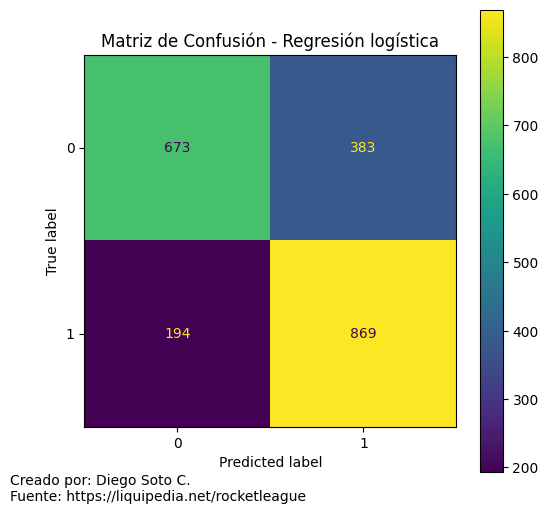

In [16]:
# Cargar el dataset, por motivos de prueba, se eliminarán las variables cualitativas y se limpiarán los nulos con el promedio
matches_by_teams_df = matches_by_teams()
matches_by_teams_df = matches_by_teams_df.drop(['color', 'team_id', 'team_name'], axis=1)
matches_by_teams_df = pd.get_dummies(matches_by_teams_df, columns=['team_region'])
matches_by_teams_df = matches_by_teams_df.fillna(matches_by_teams_df.mean())
X = matches_by_teams_df.drop('winner', axis=1)
y = matches_by_teams_df.winner

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Configurar la figura y el fondo blanco
fig, ax = plt.subplots(figsize=(6, 6))

disp.plot(ax=ax)

# Agregar texto personalizado
fig.set_facecolor('white') # Cambia el color de fondo, esto principalmente para cuando se guarde el png
plt.title('Matriz de Confusión - Regresión logística')
plt.text(-0.2, -0.2,
         'Creado por: Diego Soto C.\nFuente: https://liquipedia.net/rocketleague',
         ha='left', transform=ax.transAxes)

# Esto se utiliza para guardar el gráfico, solo se quita de comentario cuando es necesario
plt.savefig('assets/confusion_LogisticRegression.png', bbox_inches='tight', dpi=300)

plt.show()

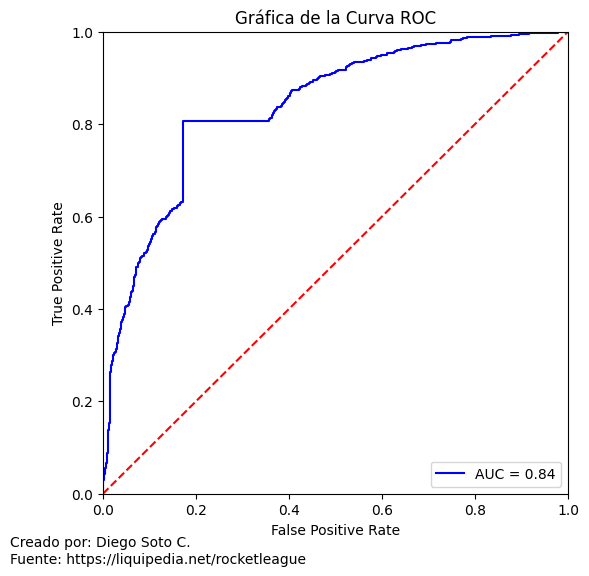

In [20]:

class_probabilities = model.predict_proba(X_test)
predict = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, predict)
roc_auc = auc(fpr, tpr)

# Configurar la figura y el fondo blanco
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_facecolor('white')

# Gráfica de la Curva ROC
plt.title('Gráfica de la Curva ROC')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Agregar texto personalizado
fig.set_facecolor('white') # Cambia el color de fondo, esto principalmente para cuando se guarde el png
plt.text(-0.2, -0.15,
         'Creado por: Diego Soto C.\nFuente: https://liquipedia.net/rocketleague',
         ha='left', transform=ax.transAxes)

# Esto se utiliza para guardar el gráfico, solo se quita de comentario cuando es necesario
plt.savefig('assets/curva_AUC_ROC.png', bbox_inches='tight', dpi=300)

plt.show()

# Curva ROC
El gráfico anterior indica que el modelo tiene un buen rendimiento